In [1]:
import keras,os
from keras.layers import Dense, Activation, Flatten, Conv2D, MaxPooling2D,Dropout, BatchNormalization
from keras.models import Sequential
from keras.utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import cv2
from keras import optimizers
from keras.layers.core import Lambda
from keras import backend as L
from keras import regularizers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [2]:
# train_path = 'char_output_extended/train'
# test_path = 'char_output_extended/test'

# train_gendata = ImageDataGenerator(rescale = 1./255,validation_split = 0.15)

# valid_gendata = ImageDataGenerator(rescale = 1./255,validation_split = 0.15)

# test_gendata  = ImageDataGenerator(rescale = 1./255)
# training_dataset  = train_gendata.flow_from_directory(directory = train_path,target_size = (128,128),
#                                                    class_mode = 'categorical',subset = 'training',batch_size = 32)
# validation_dataset = valid_gendata.flow_from_directory(directory = train_path,target_size = (128,128),
#                                                   class_mode = 'categorical',subset = 'validation',batch_size = 32)
# testing_dataset = test_gendata.flow_from_directory(directory = test_path,target_size = (128,128),
#                                                 class_mode = 'categorical',batch_size = 32)


In [3]:
train_path = 'char_output_extended/train'
test_path = 'char_output_extended/test'

train_gendata = ImageDataGenerator(rescale=1./255, validation_split=0.15)
valid_gendata = ImageDataGenerator(rescale=1./255, validation_split=0.15)
test_gendata = ImageDataGenerator(rescale=1./255)

training_dataset = train_gendata.flow_from_directory(directory=train_path, target_size=(128,128),
                                                    class_mode='sparse', subset='training', batch_size=32)
validation_dataset = valid_gendata.flow_from_directory(directory=train_path, target_size=(128,128),
                                                       class_mode='sparse', subset='validation', batch_size=32)
testing_dataset = test_gendata.flow_from_directory(directory=test_path, target_size=(128,128),
                                                  class_mode='sparse', batch_size=32)

Found 2732 images belonging to 48 classes.
Found 470 images belonging to 48 classes.
Found 857 images belonging to 48 classes.


In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Define the RNN model architecture
model = Sequential()

model.add(LSTM(64, return_sequences=True, input_shape=(timesteps, features)))
model.add(LSTM(64))

model.add(Dense(48, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
palm_model = model.fit(training_dataset, validation_data=validation_dataset, epochs=40, steps_per_epoch=5, verbose=1)


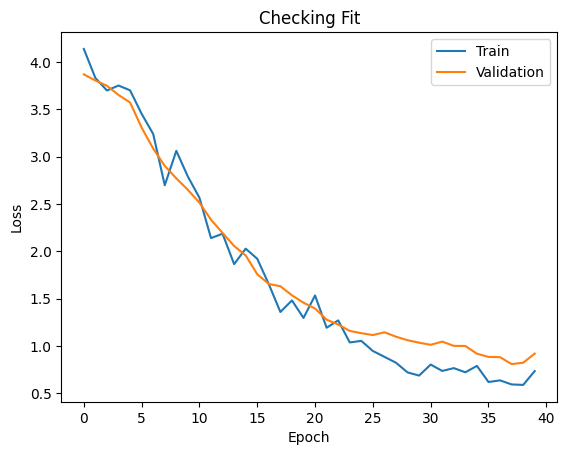

In [6]:
plt.plot(palm_model.history['loss'])
plt.plot(palm_model.history['val_loss'])
plt.title('Checking Fit')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [7]:
import numpy as np
from tensorflow.keras.preprocessing import image


# Define the class labels
class_labels = training_dataset.class_indices
class_labels = {v: k for k, v in class_labels.items()}

# Function to predict class labels for new images
def predict_image(image_path):
    img = image.load_img(image_path, target_size=(128, 128))
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    img /= 255.0  # Normalize the image

    prediction = model.predict(img)
    predicted_class = np.argmax(prediction)

    return class_labels[predicted_class]

# Example usage
image_path = 'forsplit/folder_1/MaI12_Page4.jpg_char_91.jpg'  # Replace 'path_to_image.jpg' with the actual path to your test image
predicted_label = predict_image(image_path)
print('Predicted class label:', predicted_label)


1/1 [==============================] - 0s 125ms/step
Predicted class label: 3357


In [7]:
# import numpy as np
# from tensorflow.keras.preprocessing import image


# # Load a new image to predict its class
# img_path = 'balanced_dataset/test2.jpg.png'
# img = image.load_img(img_path, target_size=(128, 128))
# img_array = image.img_to_array(img)
# img_array = np.expand_dims(img_array, axis=0)
# img_array /= 255.0

# # Make a prediction
# predictions = model.predict(img_array)
# predicted_class = np.argmax(predictions[0])

# print(predicted_class)

# class_indices = training_dataset.class_indices
# inverse_map = {v: k for k, v in class_indices.items()}
# predicted_label = inverse_map[predicted_class]

# print(predicted_label)

In [8]:
model.save('mytrailmodel.h5')